# **Discussion 2 Notebook**

## In today's discussion, we have two main parts as follows.

### Part I: BeautifulSoup for data scraping 

### Part II: BigQuery and pandas for data processing

### **Let's start coding!**



## **Part I: BeautifulSoup to Identify Trending Developers in GitHub**

### First, we set up the environment:

In [49]:
# Use requests package to get the url we need
import requests
# BetifulSoup to parse the web page
from bs4 import BeautifulSoup



Here, we will focus on collecting trending developers in GitHub, and do a short decriptive analysis on them. 

In [50]:
url = "https://github.com/trending/developers"
r = requests.get(url)
print(url)

https://github.com/trending/developers


In [51]:
r.text

'\n\n\n\n\n<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-QV1ZNBjZz8stPx+uh4ZAKc6AJ1z8A9VHut/SGtgbc+iYLfhrh68QmDH3rZgkXJ0BWIOcDw+ILnWcctH0ljcHPg==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-415d593418d9cfcb2d3f1fae87864029.css" />\n  <link crossorigin="anonymous" media="all" integrity="sha512-m/8AYUs5YZY9WiQLazEoK44ETWrLnQ1pbgI5mtI65ANEpbX9zK3YdAUtwFN4

### Since it is a HTML page, we then choose to use html.parser.

In [55]:
soup = BeautifulSoup(r.text, 'html.parser')

Let's take a look at the source code.

In [ ]:
print(soup.prettify())

### Let's check this page's title

In [57]:
soup.select_one('title').text

'Trending  developers on GitHub today · GitHub'

### Check if we are getting the right tag.

In [58]:
developer_nodes = soup.select('.h3.lh-condensed')
len(developer_nodes)

25

Let's check one of those developer.

In [64]:
test_node = developer_nodes[0]
test_node.find('a')

<a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"TRENDING_DEVELOPERS_PAGE","click_target":"OWNER","click_visual_representation":"TRENDING_DEVELOPER","actor_id":null,"record_id":1326112,"originating_url":"https://github.com/trending/developers","user_id":null}}' data-hydro-click-hmac="edfeb5472809d8a17a2fa961794f03334b649e91b89d154fdc1d264d89c3cd3b" href="/tiangolo">
            Sebastián Ramírez
</a>

### Now let's check how to gather the trending top 25 developers in GitHub

In [65]:
def find_developers(nodes):
    res = []
    for index, node in enumerate(nodes):
        # get the developer name
        name = node.find('a').text

        # refine name by replcing the spaces and \n char
        name = name.replace(' ', '').replace('\n', '')

        # get the URL
        relative_url = node.find('a').get('href')

        # construct the URL
        abs_url = 'https://github.com' + relative_url

        # append the name and url to res list
        res.append([index, name, abs_url])
    
    return res


### Now we proceed to extract the developer's information for their followers and stars.

In [66]:
# Trending Developers
combination = find_developers(developer_nodes)
[c for c in combination]

[[0, 'SebastiánRamírez', 'https://github.com/tiangolo'],
 [1, 'RemiRousselet', 'https://github.com/rrousselGit'],
 [2, 'StephanDilly', 'https://github.com/extrawurst'],
 [3, 'JesseDuffield', 'https://github.com/jesseduffield'],
 [4, 'PeterThaleikis', 'https://github.com/spekulatius'],
 [5, 'HenrikRydgård', 'https://github.com/hrydgard'],
 [6, 'ThomasLovén', 'https://github.com/thomasloven'],
 [7, 'SridharRatnakumar', 'https://github.com/srid'],
 [8, 'AlexGaynor', 'https://github.com/alex'],
 [9, 'VladimirMihailenco', 'https://github.com/vmihailenco'],
 [10, 'FrancoisZaninotto', 'https://github.com/fzaninotto'],
 [11, 'ArvidNorberg', 'https://github.com/arvidn'],
 [12, 'JoeBlock', 'https://github.com/unixorn'],
 [13, 'Avelino', 'https://github.com/avelino'],
 [14, 'AnTao', 'https://github.com/an-tao'],
 [15, 'ChristianMuehlhaeuser', 'https://github.com/muesli'],
 [16, 'NedBatchelder', 'https://github.com/nedbat'],
 [17, 'TobiasKoppers', 'https://github.com/sokra'],
 [18, '偏右', 'https://

In [69]:
# interate across the combination.
for index, name, url in combination:

    r = requests.get(url)

    # parse the page
    soup = BeautifulSoup(r.text, 'html.parser')

    # select the class
    class_node = soup.select('.text-bold.text-gray-dark')

    # get the text for each number
    follower, stars, following = [node.text for node in class_node]

    print('{}: {} has {} followers, {} stars, and is currently following {} other developers.'.format(index, name, follower, following, stars))


0: SebastiánRamírez has 5.2k followers, 502 stars, and is currently following 3 other developers.
1: RemiRousselet has 1.9k followers, 132 stars, and is currently following 51 other developers.
2: StephanDilly has 260 followers, 988 stars, and is currently following 112 other developers.
3: JesseDuffield has 1.2k followers, 34 stars, and is currently following 1 other developers.
4: PeterThaleikis has 141 followers, 2.1k stars, and is currently following 867 other developers.
5: HenrikRydgård has 1.1k followers, 24 stars, and is currently following 22 other developers.
6: ThomasLovén has 482 followers, 32 stars, and is currently following 0 other developers.
7: SridharRatnakumar has 356 followers, 946 stars, and is currently following 69 other developers.
8: AlexGaynor has 5.6k followers, 149 stars, and is currently following 38 other developers.
9: VladimirMihailenco has 411 followers, 200 stars, and is currently following 4 other developers.
10: FrancoisZaninotto has 2.7k followers, 

ValueError: ignored

## **Search Engine Optimization (SEO)**

Note that the crawlers can be much more computationally expensive than humans, therefore we have rules for the crawlers! 

Check https://www.reddit.com/robots.txt


## **Part II: SQL, BigQuery, and Pandas**

## Basics about SQL

What is Structured Query Language (SQL)? Simply put, SQL is the computer standard language for accessing and processing relational databases. For example, an e-commerce website needs to store user and product information in the database, it is achieved through SQL.

## Querying

The most frequently used SQL operation is **Query**. Let's say we have a $3\times 3$ table below, and let's call the table `students`.



>studentID | course | score
>--- | --- | ---
>100 | ECS189L | 95
>101 | ECS120 | 89
>102 | ECS160 | 97

To query the data in the database table, we use the following SQL statement:

```
SELECT * FROM <TableName>
```
Here since we named the table as `students`. We use star (*) to select all columns:

```
SELECT * FROM students
```



When using `SELECT * FROM students`, `SELECT` is a keyword, which means that a query will be executed, `*` means "all columns", and `FROM` means which table will be queried from, in this example it is the `students` table.

## Query with conditions

However, in many cases, we do not want to obtain all records, but selectively obtain records with specified conditions based on conditions.

`SELECT` statement can set query conditions through `WHERE` conditions, and the query results are records that meet the query conditions. For example, to specify the condition "Students with a score above 90", write the `WHERE` condition as 

```
SELECT * FROM students WHERE score > 90
```

Among them, the `score > 90` after the `WHERE` keyword is the condition. `score` is the name of the column, which stores the student’s scores. Therefore, `score > 90` will filter out records with specified conditions.

To apply multiple conditions you can use `AND`, `OR`, `NOT`. For example, 

```
SELECT * FROM students WHERE (score > 95 OR score < 80)
```


## Column Selection

If we only want to return the data of certain columns, but not all columns, we can use 

```
SELECT column 1, column 2 FROM <TableName>
```

So that the result set contains only the specified columns. For example,

```
SELECT studentID, course FROM students WHERE score > 90
```

## Ordering

When we use `SELECT` queries, you may notice that query result is sorted by studentID, that is, sorted by primary key. What if we want to sort according to other criteria? You can add an `ORDER BY` clause. For example, sort by grade from high to low:

```
SELECT 
  studentID, score
FROM 
  students 
WHERE 
  score > 90
ORDER BY 
  score DESC
```

Keyword `DESC` means descending order.


## Counting
Let's say we want to the number of scores that are higher than 90

```
SELECT 
  COUNT(*) 
FROM 
  students 
WHERE 
  score > 90
```

`COUNT(*)` indicates the number of total rows of the query. For calculation, we also have `MAX`, `MIN`, `SUM`, and `AVG`.


## Grouping

If we want to count the number of students in class ECS189L, we know that we can use 

```
SELECT 
  COUNT(*) 
FROM 
  students 
WHERE
  course = ECS189L
```

However, if we want to continue to count the number of students in other classes, do we have to constantly modify the `WHERE` condition to execute the `SELECT` statement?

In fact, SQL also provides the "group aggregation" function using `GROUP BY`:

```
SELECT 
  course, COUNT(*) 
FROM 
  students 
GROUP BY 
  course
```

## Now, BigQuery time!

# Before you start using BigQuery

1.  Make sure your account is under the [SANDBOX](https://cloud.google.com/blog/products/data-analytics/query-without-a-credit-card-introducing-bigquery-sandbox) mode, such that you do not need to register with your credit card and it is free.

2.  Create a Cloud Platform project if you do not already have one. The query will be runned under the project_id you specified (the default project Name is 'My First Project', but you will need to find out the ID instead of the Name).

## Step 1. Provide your credentials to the runtime
You will be asked to login your email and paste the code in the command line.

In [70]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## 2. Declare the Cloud project ID which will be used throughout this notebook. You need to login your [BigQuery](https://cloud.google.com/bigquery/) to find out your own project id and paste it below.


In [45]:
# For example mine is test-project-ecs189l, so I will run project_id = 'test-project-ecs189l'
# project_id = 'Paste Your Project ID here to Replace This String'
project_id = 'ecs189l-davis-test'

## 3. Use BigQuery through pandas-gbq

The `pandas-gbq` library is a community led project by the pandas community. It covers basic functionality, such as writing a DataFrame to BigQuery and running a query, but as a third-party library it may not handle all BigQuery features or use cases.

[Pandas GBQ Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_gbq.html)


# Example 1: What are the most popular sharing bikes starting stations in Austin?
This query looks at all of the biking events available in Austin between 2012-01-01 and 2016-01-01, and returns the top/bottom 30 most popular places to begin their biking. 

Looks like we need to place more share bikes on those places!

In [46]:
import pandas as pd

### starting station
Start = pd.io.gbq.read_gbq('''
SELECT
  start_station_name as StationName,
  COUNT(trip_id) as CountTrips
FROM
  `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE
  start_time BETWEEN TIMESTAMP("2012-01-01") AND TIMESTAMP("2016-01-01")
GROUP BY
  StationName
ORDER BY
  CountTrips DESC
LIMIT 30
''', project_id=project_id, dialect='standard')


### ending station
End = pd.io.gbq.read_gbq('''
SELECT
  end_station_name as StationName,
  COUNT(trip_id) as CountTrips
FROM
  `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE
  start_time BETWEEN TIMESTAMP("2012-01-01") AND TIMESTAMP("2016-01-01")
GROUP BY
  StationName
ORDER BY
  CountTrips desc
LIMIT 30
''', project_id=project_id, dialect='standard')



## Top 10 most popular starting station

In [71]:
# Show the top 10 most popular starting station
Start

,StationName,CountTrips
0,City Hall / Lavaca & 2nd,16762
1,5th & Bowie,15796
2,4th & Congress,14699
3,2nd & Congress,14307
4,Riverside @ S. Lamar,14279
5,Convention Center / 4th St. @ MetroRail,13956
6,Capitol Station / Congress & 11th,11894
7,Zilker Park at Barton Springs & William Barton...,11534
8,Davis at Rainey Street,10511
9,Barton Springs & Riverside,10440


## Top 10 most popular ending station

In [72]:
# Show the top 10 most popular ending station
End

,StationName,CountTrips
0,City Hall / Lavaca & 2nd,19600
1,4th & Congress,16330
2,2nd & Congress,16252
3,Convention Center / 4th St. @ MetroRail,15824
4,5th & Bowie,14842
5,Riverside @ S. Lamar,13843
6,Zilker Park at Barton Springs & William Barton...,13032
7,Barton Springs & Riverside,10856
8,Capitol Station / Congress & 11th,10150
9,Davis at Rainey Street,10055


# Example 2: Do we have seasonal effect for sharing bikes?
This query looks at all of the biking events available in Austin between 2012-01-01 and 2016-01-01, and returns the table. 

Do people spend more time biking for one season over other seasons?

In [ ]:
df = pd.io.gbq.read_gbq('''
SELECT
  start_time as StartTime,
  duration_minutes as Duration
FROM
  `bigquery-public-data.austin_bikeshare.bikeshare_trips`
WHERE
  start_time BETWEEN TIMESTAMP("2012-01-01") AND TIMESTAMP("2016-01-01")
ORDER BY
  StartTime desc
''', project_id=project_id, dialect='standard')

df[:10]

,StartTime,Duration
0,2015-12-31 23:12:56+00:00,6
1,2015-12-31 23:12:55+00:00,11
2,2015-12-31 23:12:39+00:00,10
3,2015-12-31 23:12:35+00:00,5
4,2015-12-31 23:12:31+00:00,10
5,2015-12-31 23:12:25+00:00,10
6,2015-12-31 23:12:13+00:00,9
7,2015-12-31 23:12:03+00:00,11
8,2015-12-31 22:12:56+00:00,22
9,2015-12-31 22:12:52+00:00,3


### Produce another column with season class.

In [ ]:
from datetime import date, datetime

Y = 2016
seasons = [('Winter', (date(Y,  1, 1),  date(Y,  3, 31))),
           ('Spring', (date(Y,  4, 1),  date(Y,  6, 30))),
           ('Summer', (date(Y,  7, 1),  date(Y,  9, 30))),
           ('Fall', (date(Y,  10, 1),  date(Y, 12, 31)))]

def get_season(t):
    t = t.replace(year=Y)
    return next(season for season, (start, end) in seasons if start <= t <= end)

# Use apply method on Dataframe/NumPy object.
df['Season'] = df['StartTime'].apply(get_season)
df[:10]

,StartTime,Duration,Season
0,2015-12-31 23:12:56+00:00,6,Fall
1,2015-12-31 23:12:55+00:00,11,Fall
2,2015-12-31 23:12:39+00:00,10,Fall
3,2015-12-31 23:12:35+00:00,5,Fall
4,2015-12-31 23:12:31+00:00,10,Fall
5,2015-12-31 23:12:25+00:00,10,Fall
6,2015-12-31 23:12:13+00:00,9,Fall
7,2015-12-31 23:12:03+00:00,11,Fall
8,2015-12-31 22:12:56+00:00,22,Fall
9,2015-12-31 22:12:52+00:00,3,Fall


### Let's plot the frequencies acorss the seasons

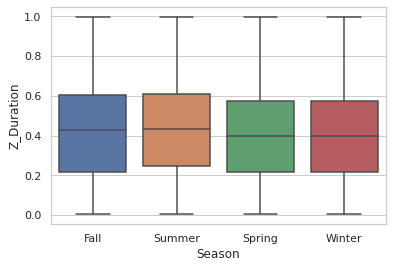

In [ ]:
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme(style="whitegrid")

# Use Z-score normalization to identify outliers
df['Z_Duration'] = np.abs(stats.zscore(df['Duration']))

# Remove outliers with one stardard deviation away from the mean
df = df[df['Z_Duration'] < 1]

# plot the boxplots
sns.boxplot(x="Season", y="Z_Duration", data=df)